# MATH50003 Numerical Analysis: Problem Sheet 6

This problem sheet explores condition numbers, indefinite integration,
and Euler's method.

Questions marked with a ⋆ are meant to be completed without using a computer.
Problems are denoted A/B/C to indicate their difficulty.

In [1]:
using LinearAlgebra, Plots

## 1. Condition numbers

**Problem 1.1⋆ (B)** Prove that, if $|ϵ_i| ≤ ϵ$ and $n ϵ < 1$, then
$$
\prod_{k=1}^n (1+ϵ_i) = 1+θ_n
$$
for some constant $θ_n$ satisfying $|θ_n| ≤ {n ϵ \over 1-nϵ}$.

**SOLUTION**

$$\prod_{k=1}^n(1+\epsilon_i)\le(1+\epsilon)^n=\sum_{k=0}^n {n \choose k} \epsilon^k\le 1+\sum_{k=1}^n n^k\epsilon^k\le 1+\sum_{k=1}^∞ n^k\epsilon^k=1+\frac{n\epsilon}{1-n\epsilon}.$$
$$\prod_{k=1}^n(1+\epsilon_i)\ge(1-\epsilon)^n=\sum_{k=0}^n {n \choose k} (-\epsilon)^k\ge 1-\sum_{k=1}^n n^k\epsilon^k\ge  1-\sum_{k=1}^∞ n^k\epsilon^k=1-\frac{n\epsilon}{1-n\epsilon}.$$

**Problem 1.2⋆ (B)** Let $A,B ∈ ℝ^{m × n}$. Prove that if the columns satisfy $\|𝐚_j\|_2 ≤ \| 𝐛_j\|_2$ then
$\|A\|_F ≤ \|B\|_F$ and $\|A \|_2 ≤ \sqrt{\hbox{rank}(B)} \|B\|_2$.

**SOLUTION**

Recalling from _[Problem Sheet 5](https://github.com/Imperial-MATH50003/MATH50003NumericalAnalysis/blob/main/sheets/week5s.ipynb/) - Problem 2.3* - SOLUTION_, we know that
$$\|A\|_F=\sqrt{\sum_{k,j}A[k,j]^2}=\sqrt{\sum_j\|\mathbf{a}_j\|_2^2}\qquad\text{and}\qquad\|B\|_F=\sqrt{\sum_j\|\mathbf{b}_j\|_2^2}.$$
Since $\|𝐚_j\|_2 ≤ \| 𝐛_j\|_2$, we have $\|A\|_F ≤ \|B\|_F$.

Recalling from _[Problem Sheet 5](https://github.com/Imperial-MATH50003/MATH50003NumericalAnalysis/blob/main/sheets/week5s.ipynb/) - Problem 3.1*_, we have
$$\|A\|_2\le\|A\|_F\le\|B\|_F\le\sqrt{\hbox{rank}(B)} \|B\|_2.$$

**Problem 1.3⋆ (C)** Compute the 1-norm, 2-norm, and ∞-norm condition numbers for the following matrices:
$$
\begin{bmatrix}
1 & 2 \\ 3 & 4
\end{bmatrix}, \begin{bmatrix}
1/3 & 1/5 \\ 0 & 1/7
\end{bmatrix}, \begin{bmatrix} 1 \\ & 1/2 \\ && ⋯ \\ &&& 1/2^n \end{bmatrix}
$$
(Hint: recall that the singular values of a matrix $A$ are the square roots of the eigenvalues of the Gram matrix
$A^⊤A$.)

**SOLUTION**

$$
A=\begin{bmatrix}
1 & 2 \\ 3 & 4
\end{bmatrix},\qquad
A^{-1}=-\frac{1}{2}\begin{bmatrix}
4 & -2 \\ -3 & 1
\end{bmatrix}
$$

$$
B=\begin{bmatrix}
1/3 & 1/5 \\ 0 & 1/7
\end{bmatrix},\qquad
B^{-1}=21\begin{bmatrix}
1/7 & -1/5 \\ 0 & 1/3
\end{bmatrix}
$$

$\|A\|_1=6$, $\|A^{-1}\|_1=7/2$, so $\kappa_1(A)=21$.

$\|A\|_∞=7$, $\|A^{-1}\|_∞=3$, so $\kappa_∞(A)=21$.

$\|B\|_1=12/35$, $\|B^{-1}\|_1=21\times 8/15=56/5$, so $\kappa_1(B)=96/25$.

$\|B\|_∞=8/15$, $\|B^{-1}\|_∞=21\times 12/35$, so $\kappa_∞(B)=96/25$

Finally, for the $2$-norms:
$\kappa_2(A)$:
For $A = \left[\begin{matrix}
1 & 2 \\
3 & 4
\end{matrix}\right]$, we have that the singular values are the $\sigma_1 = \sqrt{\lambda_1}, \sigma_2 = \sqrt{\lambda_2}$, where $\lambda_1$ and $\lambda_2$ are the eigenvalues of $A^TA$.
$$
A^TA = \left[\begin{matrix}
10 & 14 \\
14 & 20
\end{matrix}\right],
$$
so an eigenvalue $\lambda$ of $A^TA$ must satisfy,
$$
\begin{align*}
(10 - \lambda)(20-\lambda) - 196 = 0 \\
\Leftrightarrow \lambda = 15 \pm\sqrt{221}.
\end{align*}
$$
The larger eigenvalue corresponds to $\sigma_1$, so $\sigma_1 = \sqrt{15  + \sqrt{221}}$, and the smaller corresponds to $\sigma_2$, so $\sigma_2 = \sqrt{15  - \sqrt{221}}$. Finally, we have $\|A\|_2 = \sigma_1, \|A^{-1}\|_2 = 1/\sigma_2$, and so $\kappa_2(A) = \sqrt{\frac{15  + \sqrt{221}}{15  - \sqrt{221}}}$.

 $\kappa_2(B)$:
For 
$$
B = \left[\begin{matrix}
1/3 & 1/5 \\
0 & 1/7
\end{matrix}\right],
$$
we have that the singular values are the $\sigma_1 = \sqrt{\lambda_1}, \sigma_2 = \sqrt{\lambda_2}$, where $\lambda_1$ and $\lambda_2$ are the eigenvalues of $A^TA$.
$$
A^TA = \left[\begin{matrix}
1/9 & 1/15 \\
1/15 & \frac{74}{5^27^2}
\end{matrix}\right].
$$
An eigenvalue $\lambda$ must satisfy:
\begin{align*}
(1/9 - \lambda)\left(\frac{74}{5^27^2}-\lambda\right) - \frac{1}{225} = 0 \\
\Leftrightarrow \lambda = \frac{1891 \pm29\sqrt{2941}}{22050}.
\end{align*}
With the same logic as above, we can then deduce that $$\|B\|_2 = \sqrt{\frac{1891 +29\sqrt{2941}}{22050}}$$ and $$\|B^{-1}\|_2 \sqrt{\frac{22050}{1891 -29\sqrt{2941}}}$$ so that,
$$
\kappa_2(B) = \sqrt{\frac{1891 +29\sqrt{2941}}{1891 -29\sqrt{2941}}}
$$

For,
$$
A_n = \left[\begin{matrix}1 \\ &1/2 \\&&\ddots \\&&&1/2^n \end{matrix}\right],\hspace{5mm}
A_n^{-1} = \left[\begin{matrix}1 \\ &2 \\&&\ddots \\&&&2^n \end{matrix}\right]
$$ 
It is clear that $$\|A_n\|_1 = \|A_n\|_∞ = 1,$$ and $$\|A_n^{-1}\|_1 = \|A_n^{-1}\|_∞ = 2^n,$$ so $\kappa_1(A_n) = \kappa_∞(A) = 2^n$.
Morover, we can clearly see the singular values $\sigma_1 = 1, \sigma_2 = 1/2, \dots, \sigma_{n+1} = 1/2^n$. So $\|A_n\|_2 = 1, \|A_n^{-1}\|_2 = 2^n$, $\kappa_2(A_n) = 2^n$

**Problem 1.4 (B)**
State a bound on the relative error on $A 𝐯$ for $\|𝐯\|_2 = 1$ for the following matrices:
$$
\begin{bmatrix}
1/3 & 1/5 \\ 0 & 1/10^3
\end{bmatrix},
 \begin{bmatrix} 1 \\ & 1/2 \\ && ⋯ \\ &&& 1/2^{10} \end{bmatrix}
$$
Compute the relative error in computing $A 𝐯$ (using `big` for a high-precision version to compare against)
where $𝐯$ is the last column of $V$ in the SVD $A = U Σ V^⊤$, computed using the `svd` command with
`Float64` inputs. How does the error compare to the predicted error bound?

**SOLUTION**

The Theorem (relative-error for matrix vector) tells us that,
$$\frac{\|\delta A \mathbf{x}\|}{\|A \mathbf{x}\|} \leq \kappa(A)\epsilon,$$
if the relative pertubation error $\|\delta A\| = \|A\| \epsilon$. For the $2-$norm, we have,
$$\|\delta A \|_2 \leq \underbrace{\frac{\sqrt{\min(m, n)} n\epsilon_m}{2 - n\epsilon_m}}_\epsilon\|A\|_2.$$
The condition number of the first matrix is 453.33 (see code below to compute that), and $\epsilon$ defined above is $\frac{2\sqrt{2}\epsilon_m}{2-2\epsilon_m} = 3.14 \cdot10^{-16},$ so the bound on the relative error is:
$$1.42 \cdot 10^{-13}.$$
The condition number of the second matrix is $2^{10}$ by the question above, and $\epsilon$ defined above is $\frac{10\sqrt{10}\epsilon_m}{2-10\epsilon_m} = 7.02\cdot 10^{-16},$ the bound on the relative error in this case is then:
$$
7.19\cdot 10^{-13}
$$

In [2]:
using LinearAlgebra

A = [1/3 1/5; 0 1/1000]
U,σ,V = svd(A)
κ = σ[1]/σ[end]
v = V[:,end]

2-element Vector{Float64}:
 -0.5144982589267497
  0.85749142360804

In [3]:
A_big = [big(1)/3 big(1)/5; 0 big(1)/1000]

2×2 Matrix{BigFloat}:
 0.333333  0.2
 0.0       0.001

In [4]:
norm(A_big*v - A*v, 2)/norm(A_big*v, 2)

1.517264699815784052267076890481696004672083972737951742743778534649639026691441e-17

In [5]:
2*sqrt(2)*eps()/(2-2*eps())* κ

1.4235529895616814e-13

In [6]:
B = diagm( 2.0 .^(0:-1:-10))
U,σ,V = svd(B)
κ = σ[1]/σ[end]
v = V[:,end]

11-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0

In [7]:
B*v

11-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0009765625

Note, this is exact so the relative error is 0, within the upper bound.

In [8]:
10*sqrt(10)*eps()/(10-10*eps()) * 2^(10)

7.190186943645085e-13

## 2. Indefinite integration

**Problem 2.1 (B)** Implement backward differences to approximate
indefinite-integration. How does the error compare to forward
and mid-point versions  for $f(x) = \cos x$ on the interval $[0,1]$?
Use the method to approximate the integrals of
$$
\exp(\exp x \cos x + \sin x), \prod_{k=1}^{1000} \left({x \over k}-1\right), \hbox{ and } f^{\rm s}_{1000}(x)
$$
to 3 digits, where $f^{\rm s}_{1000}(x)$ was defined in PS2.

**SOLUTION**

We can implement the backward difference solution as follows:

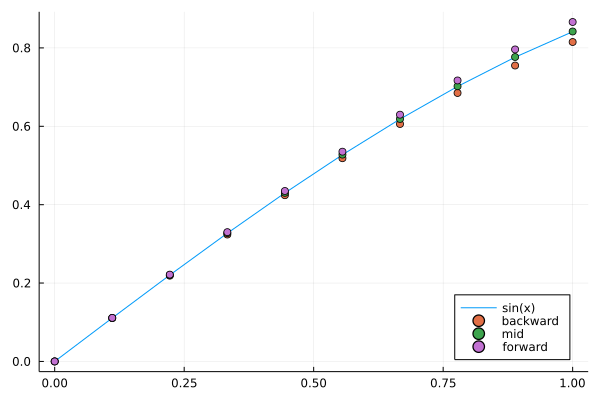

In [9]:
c = 0 # u(0) = 0
f = x -> cos(x)
n = 10

x = range(0,1;length=n)
h=step(x)
A = Bidiagonal([1; fill(1/h, n-1)], fill(-1/h, n-1), :L)
ub = A\[c; f.(x[2:end])]

##adding the forward and midpoint solutions here as well for comparison
m = (x[1:end-1] + x[2:end])/2

uf = A \ [c; f.(x[1:end-1])]
um = A \ [c; f.(m)]

plot(x, sin.(x); label="sin(x)", legend=:bottomright)
scatter!(x, ub; label="backward")
scatter!(x, um; label="mid")
scatter!(x, uf; label="forward")

Comparing each method's errors, we see that the backward method has the same error as the forward method:

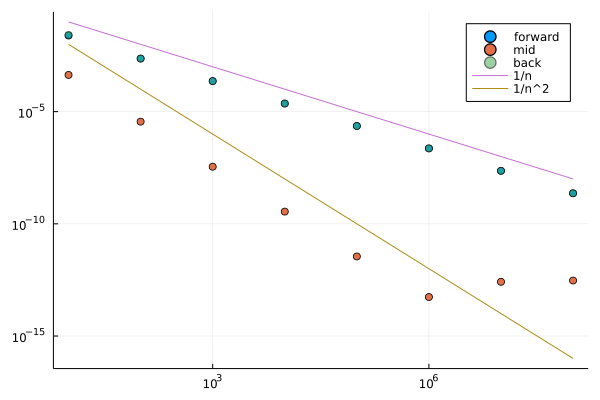

In [10]:
function indefint(x)
    h = step(x) # x[k+1]-x[k]
    n = length(x)
    L = Bidiagonal([1; fill(1/h, n-1)], fill(-1/h, n-1), :L)
end

function forward_err(u, c, f, n)
    x = range(0, 1; length = n)
    uᶠ = indefint(x) \ [c; f.(x[1:end-1])]
    norm(uᶠ - u.(x), Inf)
end

function mid_err(u, c, f, n)
    x = range(0, 1; length = n)
    m = (x[1:end-1] + x[2:end]) / 2 # midpoints
    uᵐ = indefint(x) \ [c; f.(m)]
    norm(uᵐ - u.(x), Inf)
end

function back_err(u, c, f, n)
    x = range(0,1;length=n)
    h=step(x)
    A = Bidiagonal([1; fill(1/h, n-1)], fill(-1/h, n-1), :L)
    ub = A\[c; f.(x[2:end])]
    norm(ub - u.(x), Inf)
end

c = 0 # u(0) = 0
f = x -> cos(x)
m = (x[1:end-1] + x[2:end])/2 # midpoints
ns = 10 .^ (1:8) # solve up to n = 10 million


scatter(ns, forward_err.(sin, 0, f, ns); xscale=:log10, yscale=:log10, label="forward")
scatter!(ns, mid_err.(sin, 0, f, ns); label="mid")
scatter!(ns, back_err.(sin, 0, f, ns); label="back",alpha=0.5)
plot!(ns, ns .^ (-1); label="1/n")
plot!(ns, ns .^ (-2); label="1/n^2")

Part two:

In [11]:
c = 0 # u(0) = 0
n = 10000

#functions defined in the solutions to problem sheet 2
f = x -> exp(exp(x)cos(x) + sin(x))
g = x -> prod([x] ./ (1:1000) .- 1)
function cont(n, x)
    ret = 2*one(x)
    for k = 1:n-1
        ret = 2 + (x-1)/ret
    end
    1 + (x-1)/ret
end

x = range(0,1;length=n)
h=step(x)
A = Bidiagonal([1; fill(1/h, n-1)], fill(-1/h, n-1), :L)
uf = A\[c; f.(x[2:end])]
ug = A\[c; g.(x[2:end])]
ucont = A\[c; cont.(1000, x[2:end])]

uf_int = uf[end]
ug_int = ug[end]
ucont_int = ucont[end]

println("first function: ")
println(uf_int)
println("second functions: ")
println(ug_int)
println("third function: ")
println(ucont_int)

first function: 
6.7957000663867175
second functions: 
0.12904294656750812
third function: 
0.6667164641665113


**Problem 2.2 (A)** Implement indefinite-integration 
where we take the average of the two grid points:
$$
{u'(x_{k+1}) + u'(x_k) \over 2} ≈ {u_{k+1} - u_k \over h}
$$
What is the observed rate-of-convergence using the ∞-norm for $f(x) = \cos x$
on the interval $[0,1]$?
Does the method converge if the error is measured in the $1$-norm?

**SOLUTION**

The implementation is as follows:

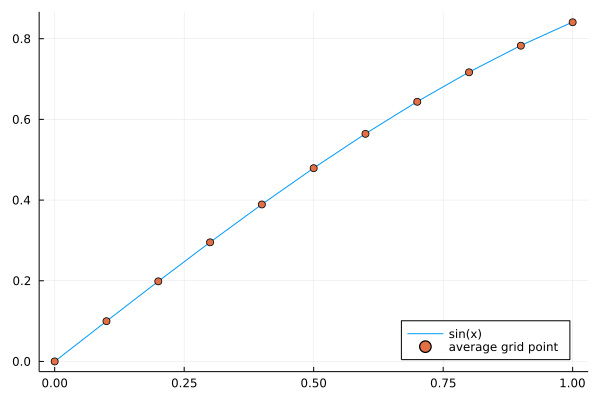

In [12]:
n = 10
x = range(0, 1; length=n+1)
h = 1/n
A = Bidiagonal([1; fill(1/h, n)], fill(-1/h, n), :L)
c = 0 # u(0) = 0
f = x -> cos(x)

𝐟 = f.(x) # evaluate f at all but last points
uₙ = A \ [c; (𝐟[1:end-1] + 𝐟[2:end])/2]

plot(x, sin.(x); label="sin(x)", legend=:bottomright)
scatter!(x, uₙ; label="average grid point")

# print(norm(uₙ - sin.(x),Inf))
# norm(uₙ - sin.(x),1)

Comparing the error to the midpoint method, we see that the errors are very similar:

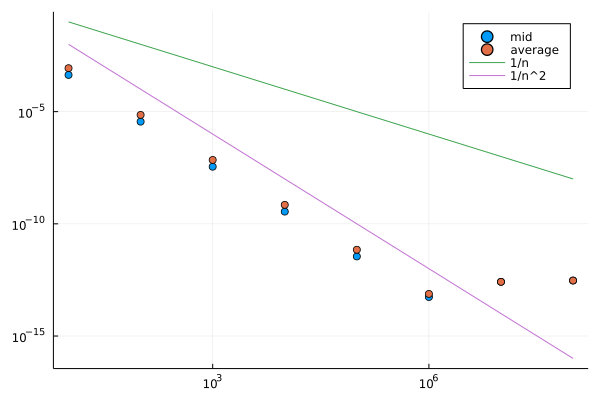

In [13]:
function average_err(u, c, f, n)
    x = range(0,1;length=n)
    h=step(x)
    A = Bidiagonal([1; fill(1/h, n-1)], fill(-1/h, n-1), :L)
    ua = A\[c; (f.(x[1:end-1]) + f.(x[2:end]))/2]
    norm(ua - u.(x), Inf)
end

c = 0 # u(0) = 0
f = x -> cos(x)
m = (x[1:end-1] + x[2:end])/2 # midpoints
ns = 10 .^ (1:8) # solve up to n = 10 million


scatter(ns, mid_err.(sin, 0, f, ns); xscale=:log10, yscale=:log10, label="mid")
scatter!(ns, average_err.(sin, 0, f, ns); label="average")
plot!(ns, ns .^ (-1); label="1/n")
plot!(ns, ns .^ (-2); label="1/n^2")

In [14]:
print(mid_err.(sin, 0, f, ns) - average_err.(sin, 0, f, ns))

[-0.0004328777127229344, -3.577319246161892e-6, -3.513151991541008e-8, -3.5068803416749006e-10, -3.4970915052667806e-12, -2.042810365310288e-14, 0.0, 0.0]

Now looking at the $L_1$ norm, we see it is converging, but to a smaller error before it starts to increase:

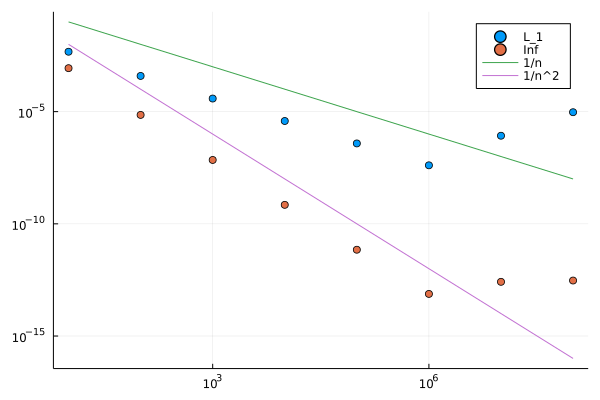

In [15]:
function average_err_l1(u, c, f, n)
    x = range(0,1;length=n)
    h=step(x)
    A = Bidiagonal([1; fill(1/h, n-1)], fill(-1/h, n-1), :L)
    ua = A\[c; (f.(x[1:end-1]) + f.(x[2:end]))/2]
    norm(ua - u.(x), 1)
end

scatter(ns, average_err_l1.(sin, 0, f, ns); xscale=:log10, yscale=:log10, label="L_1")
scatter!(ns, average_err.(sin, 0, f, ns); label="Inf")
plot!(ns, ns .^ (-1); label="1/n")
plot!(ns, ns .^ (-2); label="1/n^2")

## 3. Euler methods

**Problem 3.1 (B)** Solve the following ODEs 
using forward and/or backward Euler and increasing $n$, the number of time-steps, 
until $u(1)$ is determined to 3 digits:
$$
\begin{align*}
u(0) &= 1, u'(t) = \cos(t) u(t) + t \\
v(0) &= 1, v'(0) = 0, v''(t) = \cos(t) v(t) + t \\
w(0) &= 1, w'(0) = 0, w''(t) = t w(t) + 2 w(t)^2
\end{align*}
$$
If we increase the initial condition $w(0) = c > 1$, $w'(0)$
the solution may blow up in finite time. Find the smallest positive integer $c$
such that the numerical approximation suggests the equation
does not blow up.

**SOLUTION**

In [16]:
function first_eq(n)
    #this function takes n and returns the estimate of u(1) using n steps
    #define the range of t
    t = range(0, 1; length=n)
    #find the step-size h
    h = step(t)

    #preallocate memory
    u = zeros(n)
    #set initial condition
    u[1] = 1
    for k=1:n-1
       u[k+1] = (1+h*cos(t[k]))*u[k] + h*t[k] 
    end
    u[end]
end
ns = 2 .^ (1:13)
println(first_eq.(ns)')

[2.0 2.5750568981571456 2.7887231159522656 2.881824999955957 2.9254124926170757 2.9465162316784763 2.9569015164393777 2.962053226375413 2.964618935882748 2.96589926513106 2.966538799730441 2.966858409692436 2.967018175359888]


We see that $u(1) = 2.96$ to three digits.

In [17]:
#define A(t)
A = t -> [0 1; cos(t) 0]

function second_eq(n)
    #this function takes n and returns the estimate of v(1) using n steps
    #define the range of t
    t = range(0, 1; length=n)
    #find the step-size h
    h = step(t)
    
    #preallocate memory
    u = zeros(2,n)
    #set initial condition
    u[:,1] = [1.0, 0.0]
    for k=1:n-1
       u[:,k+1] = (I + h .* A(t[k]))*u[:,k] + h .* [0, t[k]] 
    end
    u[1,end]
end
ns = 2 .^ (1:13)
println(second_eq.(ns)')

[1.0 1.3642544755164523 1.5225506467348051 1.5962359873789465 1.6318006366873792 1.649274388412367 1.6579354745564159 1.6622472382628792 1.6643984462037793 1.6654728843070914 1.6660098122180145 1.6662782034290025 1.6664123808534863]


We see that $v(1)$ is 1.66 to three digits. Finally,

In [18]:
#define F(t)
function F(t, w)
   [w[2], t*w[1] + 2*w[1]*w[1]]
end

function third_eq(n=1000, c=1.0)
    #this function takes n and returns the estimate of w(1)
    #using n steps and with initial condition w(0) = c, with c defaulting to 0
    #if no argument is passed
    
    #define the range of t
    t = range(0, 1; length=n)
    #find the step-size h
    h = step(t)
    #preallocate memory
    w = zeros(2,n)
    #set initial condition
    w[:,1] = [c, 0.0]
    for k=1:n-1
       w[:,k+1] = w[:,k] + h .* F(t[k], w[:,k])
    end
    w[1,end]
end
ns = 2 .^ (1:18)
println(third_eq.(ns)')

[1.0 1.7037037037037037 2.1161619507432423 2.405051959928199 2.584234164229442 2.6856795754795195 2.739930778204141 2.7680246576714547 2.7823256423488796 2.789541227463252 2.793165496520641 2.7949817759493967 2.7958909551335647 2.796345805000219 2.796573295053037 2.7966870563658666 2.7967439410945523 2.796772384477209]


For $c = 1$, we see that $w(1) = 2.80$ to 3 digits. Now consider for $c > 1$:

In [19]:
function third_eq(c)
    #this function takes n and returns the estimate of w(1)
    #using n steps and with initial condition w(0) = c, with c defaulting to 0
    #if no argument is passed
    n=100000
    #define the range of t
    t = range(0, 1; length=n)
    #find the step-size h
    h = step(t)
    #preallocate memory
    w = zeros(2,n)
    #set initial condition
    w[:,1] = [c, 0.0]
    for k=1:n-1
       w[:,k+1] = w[:,k] + h .* F(t[k], w[:,k])
    end
    w[1,end]
end
cs = 2:10
c_vals = third_eq.(cs)

9-element Vector{Float64}:
   14.072754189412795
   74.07211156067653
 1546.2816719417872
   Inf
   Inf
   Inf
   Inf
   Inf
   Inf

It appears that $c = 2$ is the smallest positive integer greater than 1 for which the numerical approximation suggests the equation does not blow up.

**Problem 3.2⋆ (B)** For an evenly spaced grid $t_1, …, t_n$, use the approximation
$$
{u'(t_{k+1}) + u'(t_k) \over 2} ≈ {u_{k+1} - u_k \over h}
$$
to recast
$$
\begin{align*}
u(0) &= c \\
u'(t) &= a(t) u(t) + f(t)
\end{align*}
$$
as a lower bidiagonal linear system. Use forward-substitution to extend this to vector linear problems:
$$
\begin{align*}
𝐮(0) &= 𝐜 \\
𝐮'(t) &= A(t) 𝐮(t) + 𝐟(t)
\end{align*}
$$

**SOLUTION**

We have,
\begin{align*}
\frac{u_{k+1} - u_k}{h} \approx \frac{u'(t_{k+1}) + u'(t_k)}{2} = \frac{a(t_{k+1})u_{k+1} + a(t_{k})u_{k}}{2} + \frac{1}{2}(f(t_{k+1}) + f(t_k)),
\end{align*}
so we can write,
\begin{align*}
\left(\frac{1}{h} - \frac{a(t_{k+1})}{2}\right)u_{k+1} + \left(-\frac{1}{h} - \frac{a(t_{k})}{2}\right)u_k = \frac{1}{2}(f(t_{k+1}) + f(t_k)).
\end{align*}
With the initial condition $u(0) = c$, we can write the whole system as,
$$
\left[\begin{matrix}
1 \\
-\frac{1}{h} - \frac{a(t_1)}{2} && \frac{1}{h} - \frac{a(t_2)}{2} \\
& \ddots && \ddots \\
 & & -\frac{1}{h} - \frac{a(t_{n-1})}{2} && \frac{1}{h} - \frac{a(t_n)}{2}
\end{matrix}\right]\mathbf{u} =  \left[\begin{matrix} 
c \\
\frac{1}{2}\left(f(t_1) + f(t_2)\right) \\
\vdots \\
\frac{1}{2}\left(f(t_{n-1}) + f(t_n)\right)
\end{matrix}\right],
$$
which is lower bidiagonal.

Now if we wish to use forward substitution in a vector linear problem, we can derive in much the same way as above:
$$
\left(\frac{1}{h}I - \frac{A(t_{k+1})}{2}\right)\mathbf{u}_{k+1} + \left(-\frac{1}{h}I - \frac{A(t_{k})}{2}\right)\mathbf{u}_k = \frac{1}{2}(\mathbf{f}(t_{k+1}) + \mathbf{f}(t_k)),
$$
to make the update equation,
$$
\mathbf{u}_{k+1} = \left(I - \frac{h}{2}A(t_{k+1})\right)^{-1}\left(\left(I + \frac{h}{2}A(t_{k})\right)\mathbf{u}_k + \frac{h}{2}(\mathbf{f}(t_{k+1}) + \mathbf{f}(t_k)) \right),
$$
with initial value,
$$
\mathbf{u}_1 = \mathbf{c}.
$$

**Problem 3.3 (B)** Implement the method designed in Problem 3.1 for the negative time Airy equation 
$$
u(0) = 1, u'(0) = 0, u''(t) = -t u(t)
$$
on $[0,50]$.
How many time-steps are needed to get convergence to 1% accuracy (the "eyeball norm")?

**SOLUTION**
We will work with,
$
\mathbf{u}(t) = \left[\begin{matrix}
u(t) \\ u'(t)
\end{matrix} \right],
$
so that our differential equation is:
$$
\mathbf{u}'(t) = \left[\begin{matrix}
u'(t) \\ u''(t)
\end{matrix} \right] =
\left[\begin{matrix}
0 & 1 \\ -t & 0
\end{matrix} \right] \mathbf{u}(t),
$$
so that,
$$
A(t) = \left[\begin{matrix}
0 & 1 \\ -t & 0
\end{matrix} \right],
$$
and with initial conditions,
$$
\mathbf{u}(0) = \left[\begin{matrix}
1 \\ 0
\end{matrix} \right].
$$

We will use the method described in Problem 3.1, with $\mathbf{f}(t) = \mathbf{0}$:

$$
\mathbf{u}_1 = \left[\begin{matrix}
1 \\ 0
\end{matrix} \right], \hspace{5mm}
\mathbf{u}_{k+1} = \left(I - \frac{h}{2}A(t_{k+1})\right)^{-1}\left(I + \frac{h}{2}A(t_{k})\right)\mathbf{u}_k.
$$

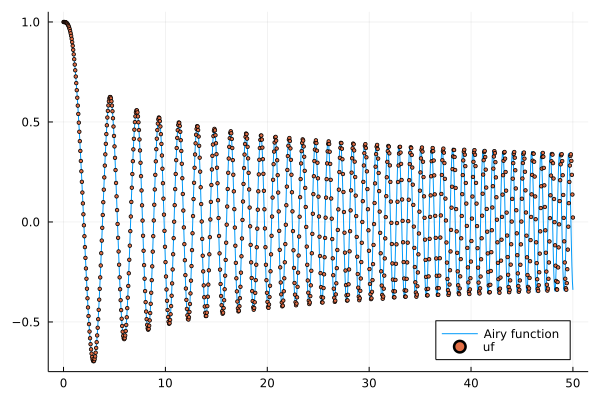

In [20]:
using SpecialFunctions
n = 1000
#define the range of t
t = range(0, 50; length=n)
#find the step-size h
h = step(t)
#define the function a
a = t -> [0 1; -t 0]

#initialise storage vector and set initial conditions
U=zeros(2, n)
U[:,1] = [1.0, 0.0]

#now iterate forward
for k = 1:n-1
    U[:,k+1] = (I - h/2 .* a(t[k+1])) \ ((I + h/2 .* a(t[k])) * U[:,k])
end

#solution found on wolfram alpha
u = t -> real(1/2 * 3^(1/6) * gamma(2/3) * (sqrt(3)airyai((-1 + 0im)^(1/3)*t) + airybi((-1+0im)^(1/3)*t)))

plot(t, u.(t), label="Airy function")
scatter!(t, U[1,:], label="uf", legend=:bottomright, markersize=2)

To see when the error goes below 1%, consider the below:

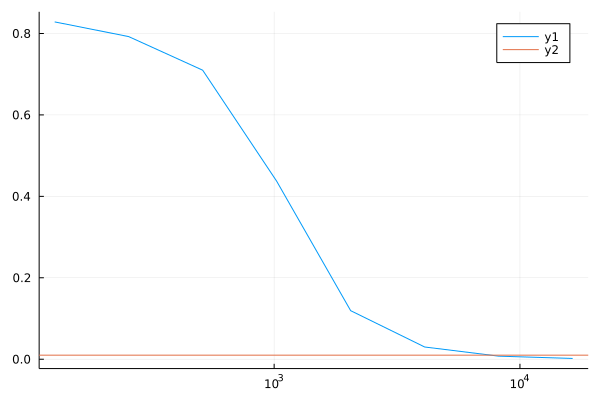

In [21]:
n = 2 .^(7:14)
function relative_err(n)
    t = range(0, 50; length=n)
    #find the step-size h
    h = step(t)
    #initialise storage vector and set initial conditions
    U=zeros(2, n)
    U[:,1] = [1.0, 0.0]
    #now iterate forward
    for k = 1:n-1
        U[:,k+1] = (I - h/2 .* a(t[k+1])) \ ((I + h/2 .* a(t[k])) * U[:,k])
    end
    norm(U[1,:] - u.(t), Inf)/norm(u.(t), Inf)
end

plot(n, relative_err.(n), xscale=:log10)
plot!([0.01], seriestype=:hline)

**Problem 3.4 (A)** Implement Heat on a graph with $m = 50$ nodes with no forcing
and initial condition $u_{m/2}(0) = 1$ and $u_k(0) = 0$, but where the first and last node are fixed
to  zero, that is replace the first and last rows of the differential equation with
the conditions:
$$
u_1(t) = u_m(t) = 0.
$$
Find the time $t$ such that  $\|𝐮(t)\|_∞ <10^{-3}$ to 2 digits.
Hint: Differentiate to recast the conditions as a differential equation.
Vary $n$, the number of time-steps used in Forward Euler, and increase $T$ in the interval $[0,T]$
until the answer doesn't change.
Do a for loop over the time-slices to find the first that satisfies the condition.
(You may wish to call `println` to print the answer and `break` to exit the for loop).

**SOLUTION**

Following the hint, we will begin by writing a function called ```heat_dissipation(T)```, which runs a simulation of the heat equation with the specified conditions up to time $T$. If the condition $\|\mathbf{u}(t)\|_∞ < 10^{-3}$ is met at a time $t^* < T$, then it will return $t^*$, else it will return $T$. We choose the value $n=1000$ not too large so that we can run this on a large range of values for $T$. Also note that we use Backward Euler, which is more stable for smaller values of $n$; $T$ can potentially be quite large, so Forward Euler may be unstable for even moderately large values of $n$.

In [22]:
function heat_dissipation(T)
    n=1000
    t = range(0, T; length=n)
    m=50
    #find the step-size h
    h = step(t)
    #define the matrix
    Δ = Tridiagonal([fill(1.0, m-2); 0], [0; fill(-2.0, m-2); 0], [0; fill(1.0, m-2)])
    
    #set initial conditions
    u = zeros(m,n)
    u[Int(m/2), 1] = 1
    for k = 1:n-1
        u[:,k+1] = (I - h*Δ)\u[:,k]
        u_inf = norm(u[:,k+1], Inf)
        if(u_inf < 0.001)
           return t[k+1] 
        end
    end
    return t[n]
end

heat_dissipation (generic function with 1 method)

We run this on a large range of values for $T$. The function returns approximately constant ($\approx 905$) values when $T > 905$, so this suggests that our answer lies somewhere around 905.

In [23]:
Ts = 10:10:1000
ts = heat_dissipation.(Ts)

100-element Vector{Float64}:
  10.0
  20.0
  30.0
  40.0
  50.0
  60.0
  70.0
  80.0
  90.0
 100.0
 110.0
 120.0
 130.0
   ⋮
 890.0
 900.0
 904.5345345345345
 904.3443443443443
 904.8648648648649
 904.2442442442442
 904.3543543543543
 904.2642642642643
 904.944944944945
 904.4644644644644
 904.7747747747748
 904.9049049049049

Plotting, we can clearly see that the time output by the function becomes the same towards the end of our range, so we will restrict our search to the end of this range.

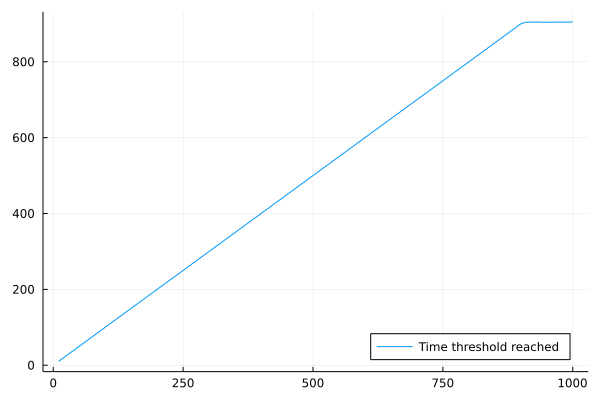

In [24]:
plot(Ts, ts, label = "Time threshold reached", legend=:bottomright)

Zooming in:

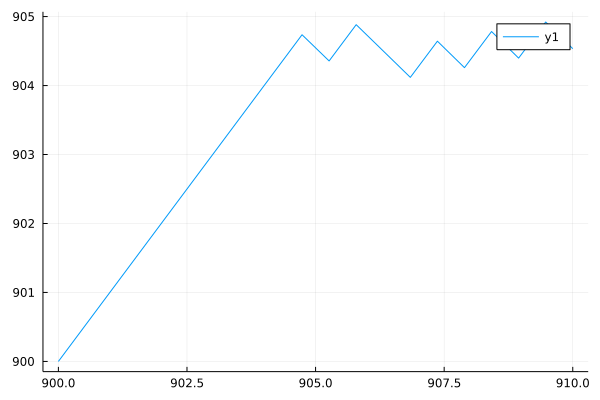

In [25]:
Ts = range(900, 910,20)
ts = heat_dissipation.(Ts)
plot(Ts,ts)

This looks promising, but it seems like the time-output is somewhat unstable even after $T$ is large enough. Inspecting the actual values of the output, we see that this is likely due to the step size we are using - it will be different for different values of $T$ (as $h = \frac{T}{n}$), and so the smallest $t$ in the discretise range may jump up and down if $n$ is not large enough. To be sure of the answer to 2 decimal places, we will need $n$ to be larger than $2 \frac{T}{0.01} \approx 180000$. We will redefine our function with $n = 200000$, and run it on a few different values of $T$ (that are definitely larger than our target time) to be sure we get the same answer to 2 decimal places.

In [26]:
function heat_dissipation_large_n(T)
    n=200000
    t = range(0, T; length=n)
    m=50
    #find the step-size h
    h = step(t)
    #define the matrix
    Δ = Tridiagonal([fill(1.0, m-2); 0], [0; fill(-2.0, m-2); 0], [0; fill(1.0, m-2)])
    
    #set initial conditions
    u = zeros(m,n)
    u[Int(m/2), 1] = 1
    for k = 1:n-1
        u[:,k+1] = (I - h*Δ)\u[:,k]
        u_inf = norm(u[:,k+1], Inf)
        if(u_inf < 0.001)
           return t[k+1] 
        end
    end
    return t[n]
end

Ts = [903, 904, 905, 906, 907]
ts = heat_dissipation_large_n.(Ts)

5-element Vector{Float64}:
 902.3859569297847
 902.3863519317597
 902.3845369226846
 902.3850419252096
 902.3878819394097

We can see that each time we get 902.38 to 2 decimal places, so this is our answer.


**Problem 3.5 (B)** Consider the equation
$$
u(0) = 1, u'(t) = -10u(t)
$$
What behaviour do you observe on $[0,10]$ of forward, backward, and that of Problem 3.1
with a step-size of 0.5? What happens if you decrease the step-size to $0.01$? (Hint: you may wish to do a plot and scale the $y$-axis logarithmically,)

**SOLUTION**

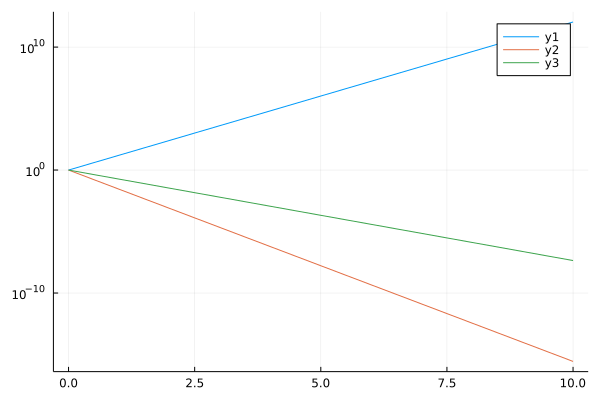

In [27]:
h = 0.5
t = range(0, 10; step=h)
n = length(t)
uᶠ = zeros(n)
uᵇ = zeros(n)
uᵗ = zeros(n)
uᶠ[1] = uᵇ[1] = uᵗ[1] = 1
a = -10
for k = 1:n-1
    uᶠ[k+1] = (1+h*a) * uᶠ[k]
    uᵇ[k+1] = (1-h*a) \ uᵇ[k]
    uᵗ[k+1] = (1-h*a/2) \ (1 + h*a/2) * uᵗ[k]
end

plot(t, abs.(uᶠ); yscale=:log10)
plot!(t, abs.(uᵇ); yscale=:log10)
plot!(t, abs.(uᵗ); yscale=:log10)

We observe that for the stepsize $h=0.5$, the forward method blows up while the other methods appear to converge.

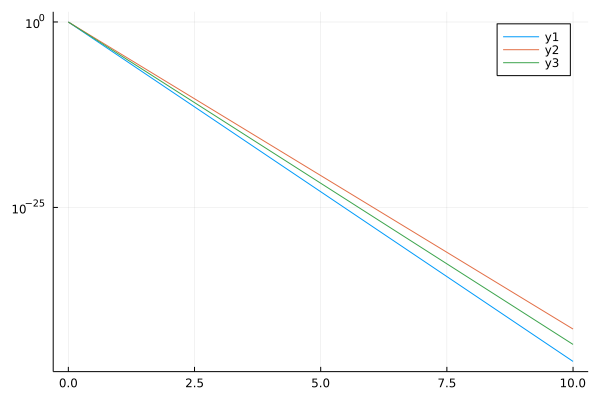

In [28]:
h = 0.01
t = range(0, 10; step=h)
n = length(t)
uᶠ = zeros(n)
uᵇ = zeros(n)
uᵗ = zeros(n)
uᶠ[1] = uᵇ[1] = uᵗ[1] = 1
for k = 1:n-1
    uᶠ[k+1] = (1+h*a) * uᶠ[k]
    uᵇ[k+1] = (1-h*a) \ uᵇ[k]
    uᵗ[k+1] = (1-h*a/2) \ (1 + h*a/2) * uᵗ[k]
end

nanabs(x) = iszero(x) ? NaN : abs(x)

plot(t, nanabs.(uᶠ); yscale=:log10)
plot!(t, nanabs.(uᵇ); yscale=:log10)
plot!(t, nanabs.(uᵗ); yscale=:log10)

For a smaller stepsize ($h = 0.01$), the forward method is also able to converge.